In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
#download datasets
train_data = datasets.EMNIST(root =  "data",
                             split='byclass',
                             train = True,
                             download = True,
                             transform = torchvision.transforms.ToTensor(),
                             target_transform = None)

test_data = datasets.EMNIST(root = "data",
                            split = 'byclass',
                            train=False,
                            download = True,
                            transform = ToTensor(),
                            target_transform = None)

In [ ]:
len(train_data),len(test_data)

(697932, 116323)

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_names = train_data.classes
len(class_names)

62

(-0.5, 27.5, 27.5, -0.5)

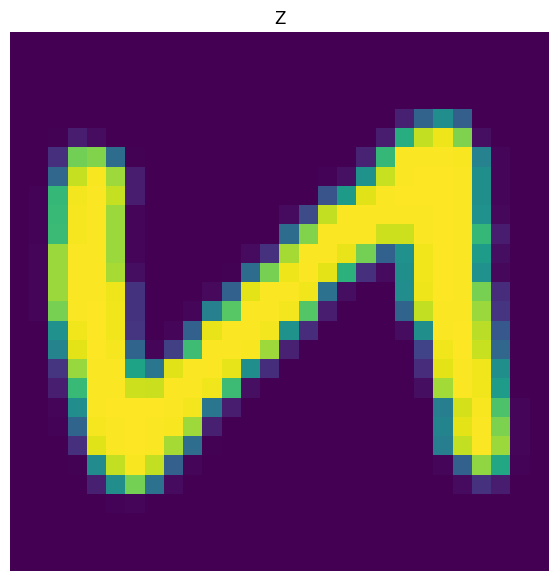

In [ ]:
#plot an sample image
plt.figure(figsize=(7,7))
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis("off")

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 'a': 36,
 'b': 37,
 'c': 38,
 'd': 39,
 'e': 40,
 'f': 41,
 'g': 42,
 'h': 43,
 'i': 44,
 'j': 45,
 'k': 46,
 'l': 47,
 'm': 48,
 'n': 49,
 'o': 50,
 'p': 51,
 'q': 52,
 'r': 53,
 's': 54,
 't': 55,
 'u': 56,
 'v': 57,
 'w': 58,
 'x': 59,
 'y': 60,
 'z': 61}

In [ ]:
#setup dataloader
from torch.utils.data import DataLoader
import os
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = 32,
                              shuffle = True,
                              num_workers = NUM_WORKERS,
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

In [ ]:
len(train_dataloader),len(test_dataloader)

(21811, 3636)

image shape : torch.Size([32, 1, 28, 28])
label asize : torch.Size([32])


Text(0.5, 1.0, '9')

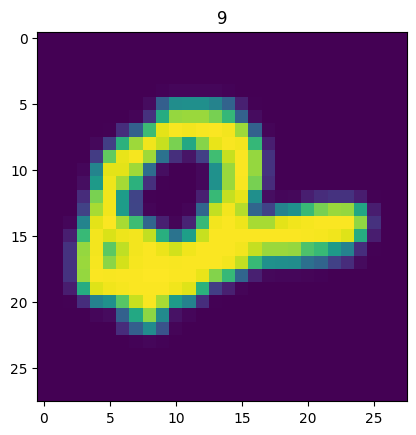

In [ ]:
#explore in dataloader
image_batch,label_batch = next(iter(train_dataloader))
print(f"image shape : {image_batch.shape}")
print(f"label asize : {label_batch.shape}")
plt.imshow(image_batch[0].permute(1,2,0))
plt.title(class_names[label_batch[0]])

In [ ]:
#build an base line model 0
class EMNISTModel(nn.Module):
  def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=1,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 1,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=1,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 1,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*10*10,#use trick here
                  out_features = output_shape)
    )
  def forward(self,x):
    return self.Classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
#instance for our model
model_0 = EMNISTModel(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_names))
model_0

EMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=62, bias=True)
  )
)

In [ ]:
#try an dummy pass
image_bt,label_bt = next(iter(train_dataloader))
image_bt.shape,label_bt.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
model_0(image_bt)

tensor([[ 0.1252,  0.0026,  0.0568,  ...,  0.0484, -0.0908, -0.0527],
        [ 0.1222, -0.0048,  0.0600,  ...,  0.0373, -0.0970, -0.0571],
        [ 0.1279,  0.0025,  0.0560,  ...,  0.0478, -0.0915, -0.0571],
        ...,
        [ 0.1276,  0.0003,  0.0524,  ...,  0.0457, -0.0900, -0.0564],
        [ 0.1191,  0.0015,  0.0655,  ...,  0.0538, -0.0904, -0.0564],
        [ 0.1265,  0.0035,  0.0672,  ...,  0.0476, -0.0934, -0.0526]],
       grad_fn=<AddmmBackward0>)

In [ ]:
#create an train and test loop function
#train_step()
#test_step()

In [ ]:
#train_step()
def train_step(model:torch.nn.Module,
               dataLoader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device='cpu'):
  model.train()
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataLoader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)
  train_loss = train_loss / len(dataLoader)
  train_acc = train_acc / len(dataLoader)
  return train_loss,train_acc

In [ ]:
#test_step()
def test_step(model:torch.nn.Module,
               dataLoader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device='cpu'):
  model.eval()
  test_loss,test_acc = 0,0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataLoader):
      X,y = X.to(device),y.to(device)
      test_pred_logits = model_0(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc = (test_pred_labels == y).sum().item() / len(test_pred_labels)
    test_loss = test_loss / len(dataLoader)
    test_acc = test_acc / len(dataLoader)
    return test_loss,test_acc


In [ ]:
#train() function to combine train_step and test_step
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int,
          device='cpu'):
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataLoader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss,test_acc = test_step(model=model,
                                    dataLoader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    #print whats happening...
    print(f"Epoch:{epochs} | train loss:{train_loss:.4f} | train acc:{train_acc:.4f} | test_loss:{test_loss:.4f} | test_acc:{test_acc:.4f}")

    #update results dictionaries
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
#train and eval model0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

#start timer
from timeit import default_timer as timer
start_timer= timer()

model_0_results = train(model=model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = 5)
#end timer and calculate it
end_timer = timer()
print(f"total training time:{end_timer-start_timer:.3f}seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#make predictions
# Assuming 'model_0' is your trained model
with torch.no_grad():
    test_pred_probs = model_0(test_data.data.unsqueeze(1).float()/255.)
    pred_classes = torch.argmax(test_pred_probs, dim=1)

#plot the predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, (image, label) in enumerate(test_data):  # Unpack image and label
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(image.permute(1,2,0),cmap="gray")  # Display the image part of the sample
  #find predictions(eg:sandels)
  pred_label = class_names[pred_classes[i]]
  #get truth label(in text form)
  truth_label = class_names[test_labels[i]]
  #create a title for the plot
  title_text = f"pred:{pred_label} | truth:{truth_label}"
  #check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis("off")